In [10]:
import numpy as np
import random
import pandas as pd

np.random.seed(0)
random.seed(0)

### SMO function

used for calculating the optimal hyperplane manually for classification

In [11]:
#SMO function

import numpy as np
import random
import time
import math

'''
C: regularization parameter
tol: numerical tolerance
max-passes: maximum number of iterations over Larange multipliers without changing
'''

def linear_classifier(alphas, X, X_i, y, b):
    return (alphas * y * np.inner(X_i, X)).sum() + b


def compute_L(alpha_i, alpha_j, y_i, y_j, C):
    if y_i != y_j:
        return max(0, alpha_j - alpha_i)
    else:
        return max(0, alpha_i + alpha_j - C)


def compute_H(alpha_i, alpha_j, y_i, y_j, C):
    if y_i != y_j:
        return min(C, C + alpha_j - alpha_i)
    else:
        return min(C, alpha_i + alpha_j)

def calculate_eta(X_i, X_j):
    i_j_inner = np.inner(X_i, X_j)
    i_i_inner = np.inner(X_i, X_i)
    j_j_inner = np.inner(X_j, X_j)

    return 2 * i_j_inner - i_i_inner - j_j_inner


def calculate_error(X_i, y_i, alphas, X, y, b):
    f_x_i = linear_classifier(alphas, X, X_i, y, b)
    E_i = f_x_i - y_i
    
    return E_i

def clip_alpha_j(alpha_j, H, L):
    if alpha_j > H:
        return H
    elif alpha_j < L:
        return L
    else:
        return alpha_j


def calculate_alpha_j(alpha_j, E_i, E_j, eta, y_j):
    return alpha_j - ((y_j * (E_i - E_j)) / eta)


def calculate_alpha_i(alpha_i, y_i, y_j, alpha_j_old, alpha_j):
    return alpha_i + (y_i * y_j) * (alpha_j_old - alpha_j)


def calculate_bs(b, X_i, y_i, alpha_i, alpha_j, E_i, E_j, X_j, y_j, alpha_i_old, alpha_j_old):
    b_one = b - E_i - y_i * (alpha_i - alpha_i_old) * np.inner(X_i, X_i) - (y_j * (alpha_j - alpha_j_old)) * np.inner(X_i, X_j) 
    b_two = b - E_j - y_i * (alpha_i - alpha_i_old) * np.inner(X_i, X_j) - (y_j * (alpha_j - alpha_j_old)) * np.inner(X_j, X_j) 

    return b_one, b_two

def compute_b(b_one, b_two, alpha_i, alpha_j, C, tol):
    if alpha_i > tol and alpha_i < C - tol:
        return b_one
    elif alpha_j > tol and alpha_j < C - tol:
        return b_two
    else:
        return (b_one + b_two) / 2

def rand_j(m, i):
    j = random.randint(0, m-1)

    while i == j:
        j = random.randint(0, m-1)

    return j
'''
SMO optimization function
'''
def Simplified_smo(C, tol, max_passes, X, y):
    m = X.shape[0]    
    b = 0
    alphas = np.zeros(m)
    alphas_old = np.zeros(m)
    passes = 0

    while passes < max_passes:
        num_changed_alphas = 0
        for i in range(m):
            E_i = calculate_error(X[i], y[i], alphas, X, y, b)
            y_i_E_i = y[i] * E_i

            if (y_i_E_i < (-1 * tol) and alphas[i] < C - tol) or (y_i_E_i > tol and alphas[i] > tol):
                j = rand_j(m, i)
                E_j = calculate_error(X[j], y[j], alphas, X, y, b)
                alphas_old[i], alphas_old[j] = alphas[i], alphas[j]
                L = compute_L(alphas[i], alphas[j], y[i], y[j], C)
                H = compute_H(alphas[i], alphas[j], y[i], y[j], C)                

                if L == H:
                    continue

                eta = calculate_eta(X[i], X[j])

                if eta >= 0:
                    continue

                alphas[j] = clip_alpha_j(calculate_alpha_j(alphas[j], E_i, E_j, eta, y[j]), H, L)

                if abs(alphas[j] - alphas_old[j]) < 0.000005:
                    continue

                alphas[i] = calculate_alpha_i(alphas[i], y[i], y[j], alphas_old[j], alphas[j])

                b_one, b_two = calculate_bs(b, X[i], y[i], alphas[i], alphas[j], E_i, E_j, X[j], y[j], alphas_old[i], alphas_old[j])

                b = compute_b(b_one, b_two, alphas[i], alphas[j], C, tol)
                num_changed_alphas += 1
        
        if num_changed_alphas == 0:
            passes += 1
        else:
            passes = 0

    return alphas, b

In [26]:

Xtrain = np.array([
     [6,  -8 ,  1],
     [6.5,-9,   1],
     [9,  -8.5, 1],
     [6.5,-9,   1],
     [5,  -2.5,-1],
     [8,  -4,  -1],
     [9.5,-4,  -1],
     [9,  -5,  -1]
  
])

X = np.insert(Xtrain, 2,1, axis = 1)

X = np.delete(Xtrain,2, axis = 1)
X = np.delete(Xtrain,2, axis = 1)

y = [1,1,1,1,-1,-1,-1,-1]
max_passes = 1000000
C= 1
tol = 1e-5

[alphas, b] = Simplified_smo(C, tol, max_passes, X, y)
print('alphas=%s' % alphas)
print('b=%s' % b)

alphas=[0.03171964 0.         0.13608909 0.         0.         0.
 0.         0.16781717]
b=-3.000029269908897


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns; sns.set() # for statistical data visualization

import sklearn.metrics as metrics
%matplotlib inline

In [33]:
# load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Set variables for the targets and features
y_train = train_data['price_range']
X_train = train_data.drop('price_range', axis=1)
y_test = test_data['price_range']
X_test = test_data.drop('price_range', axis=1)


### Data normalization

In [32]:
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm1 = (X_train - X_train.mean(axis = 0))/ X_train.std(axis = 0)
X_train_norm = scaler.fit_transform(X_train)
#y_train_norm = (y_train - y_train.mean(axis = 0))/ y_train.std(axis = 0)

X_test_norm1 = (X_test - X_train.mean(axis = 0))/ X_train.std(axis = 0)

X_test_norm = scaler.transform(X_test)
#y_test_norm = (y_test - y_test.mean(axis = 0))/ y_test.std(axis = 0)


### Linear Kernel model

The linear kernel is written as $<x,x'>$.

The parameter C, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[0.592, 0.604, 0.7, 0.792, 0.824, 0.844, 0.728, 0.782, 0.758, 0.758, 0.758]


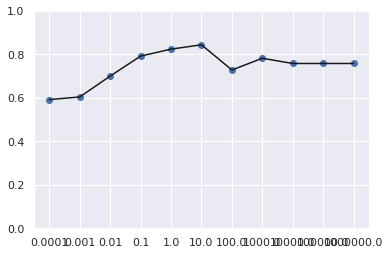

In [16]:
from sklearn.svm import LinearSVC
from sklearn import metrics
from matplotlib.ticker import ScalarFormatter
# Train Linear kernel SVM for different values of C on train data
Cs = [10e-5 , 10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3,10e4,10e5  ] # hyper-parameter candidates
accuracy_scores_lsvc = []
for c in Cs:
  lsvc = LinearSVC(random_state = 7, C = c , max_iter= 1000 )
  #Fit the model and get prediction and evalutation on testing data.
  lsvc.fit( X_train_norm, y_train)
  y_pred_lsvc = lsvc.predict(X_test_norm)
  # Save your results
  accuracy_scores_lsvc.append(metrics.accuracy_score(y_test,y_pred_lsvc))

# Plot accuracy on test data
print('linear SVC accuracy score =%s' % accuracy_scores_lsvc)
x = range(len(Cs))
plt.plot(x, accuracy_scores_lsvc, 'bo', x, accuracy_scores_lsvc, 'k')
plt.xticks(x,Cs)
plt.ylim(0, 1);

### RBF kernel model

The RBF kernel is expressed as $exp(γ\|x-x' \|)$.

$\gamma$ defines how much influence a single training example has. The larger $\gamma$ is, the closer other examples must be to be affected.

[0.242, 0.71, 0.914, 0.806, 0.246, 0.242, 0.242, 0.242, 0.242, 0.242]


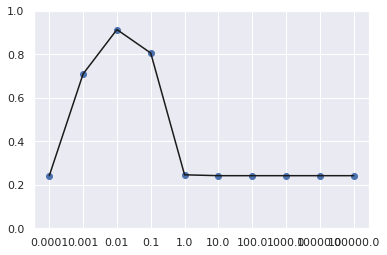

In [17]:
from sklearn.svm import SVC

# Train RBF kernel SVM for different values of gamma on train data
accuracy_scores_lsvc = []
gammas = [ 10e-5 , 10e-4,10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3,10e4  ] #hyper-parameter candidates
accuracy_scores_rsvc =[]
for g in gammas:
  rsvc = SVC(random_state = 7, C=1.0, kernel='rbf', gamma = g)
  # Fit the model and get prediction and evalutation on testing data.
  rsvc.fit(X_train_norm,y_train)
  y_pred_rsvc = rsvc.predict(X_test_norm)
  # Save your results
  accuracy_scores_rsvc.append(metrics.accuracy_score(y_test,y_pred_rsvc))

# Plot accuracy on test data
print('rbf kernel accuracy score =%s' % accuracy_scores_rsvc)
x = range(len(gammas))
plt.plot(x, accuracy_scores_rsvc, 'bo', x, accuracy_scores_rsvc, 'k')
plt.xticks(x,gammas)
plt.ylim(0, 1);

### Random Forrest model

(500,)
[0.772, 0.86, 0.864, 0.87]


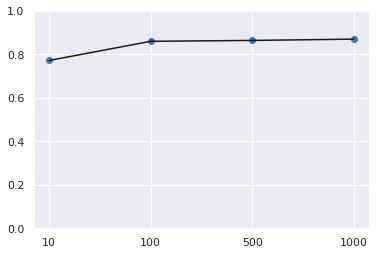

In [18]:
from sklearn.ensemble import RandomForestClassifier

n_trees = [10, 100,500,1000] # fill in the hyper-parameter candidates
#  Train Random Forest for different values of number of estimators on train data
accuracy_scores_rf =[]
for n in n_trees:
  rf = RandomForestClassifier(random_state = 7, n_estimators=n)
  # Fit the model and get prediction and evalutation on testing data.

  rf.fit(X_train_norm,y_train)
  #  Save your results
  y_pred_rf = rf.predict(X_test_norm)
  accuracy_scores_rf.append(metrics.accuracy_score(y_test,y_pred_rf))
print(y_test.shape)
#  Plot accuracy on test data
print('Random forest accuracy score =%s' % accuracy_scores_rf)
x = range(len(n_trees))
plt.plot(x, accuracy_scores_rf, 'bo', x, accuracy_scores_rf, 'k')
plt.xticks(x,n_trees)
plt.ylim(0, 1);


# 5 Fold Cross Validation

### Linear SVC model Cross validation

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
n_folds = 5

# the cross-validation procedure
cv = KFold(n_splits=n_folds, shuffle=True, random_state=1)
results = list()
for train_ix, test_ix in cv.split(X_train_norm):
	# split data
	X_train1, X_test1 = X_train_norm[train_ix, :], X_train_norm[test_ix, :]
	y_train1, y_test1 = y_train[train_ix], y_train[test_ix]
	# define the model
	model = LinearSVC(random_state = 7 , max_iter= 10000 )
	# define search space
	space = dict()
	space['C'] = Cs
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
	# execute search
	result = search.fit(X_train1, y_train1)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test1)
	# evaluate the model
	acc = metrics.accuracy_score(y_test1, yhat)
	# store the result
results.append(acc)

# report progress
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


>acc=0.833, est=0.837, cfg={'C': 100.0}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### RBF model Cross validation

In [30]:
for train_ix, test_ix in cv.split(X_train_norm):
	# split data
	X_train1, X_test1 = X_train_norm[train_ix, :], X_train_norm[test_ix, :]
	y_train1, y_test1 = y_train[train_ix], y_train[test_ix]
	# define the model
	model = SVC(random_state = 7, C=1.0, kernel='rbf')
	# define search space
	space = dict()
	space['gamma'] = gammas
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
	# execute search
	result = search.fit(X_train1, y_train1)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test1)
	# evaluate the model
	acc = metrics.accuracy_score(y_test1, yhat)
	# store the result
results.append(acc)
# report progress
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))


>acc=0.927, est=0.891, cfg={'gamma': 0.01}


### Random Forrest Cross Validation

In [31]:
for train_ix, test_ix in cv.split(X_train_norm):
	# split data
	X_train1, X_test1 = X_train_norm[train_ix, :], X_train_norm[test_ix, :]
	y_train1, y_test1 = y_train[train_ix], y_train[test_ix]
	# define the model
	model = RandomForestClassifier(random_state = 7)
	# define search space
	space = dict()
	space['n_estimators'] = n_trees
	# define search
	search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
	# execute search
	result = search.fit(X_train1, y_train1)
	# get the best performing model fit on the whole training set
	best_model = result.best_estimator_
	# evaluate model on the hold out dataset
	yhat = best_model.predict(X_test1)
	# evaluate the model
	acc = metrics.accuracy_score(y_test1, yhat)
	# store the result
results.append(acc)
# report progress
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
print('Linear SVC             rbf kernel       Random forrest')
print(results)

>acc=0.887, est=0.880, cfg={'n_estimators': 1000}
Linear SVC             rbf kernel       Random forrest
[0.8333333333333334, 0.9266666666666666, 0.8866666666666667]
